In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import time
import pandas_profiling as pp
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/damps/Documents/Exasens.csv")

For Gender, 0= Female, 1=Male
For Diagnosis, COPD =Chronic Obstructive Pulmonary Disease, HC =Healthy Controls


In [3]:
df.head(20)

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3
5,COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0,NaN,NaN,NaN,NaN
6,COPD,305-4,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0,NaN,NaN,NaN,NaN
7,COPD,306-3,-327.78,-318.6775535,-507.23,-469.0241943,1.0,60.0,2.0,NaN,NaN,NaN,NaN
8,COPD,307-3,-330.18,-320.6174777,-473.73,-467.3618538,1.0,76.0,2.0,NaN,NaN,NaN,NaN
9,COPD,308,NaN,NaN,NaN,NaN,1.0,77.0,2.0,NaN,NaN,NaN,NaN


In [4]:
df.isnull().values.any()
df.isnull().sum().sum()

2807

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,399.0,0.398496,0.490203,0.0,0.0,0.0,1.0,1.0
Age,399.0,48.736842,18.566962,17.0,31.0,49.0,64.0,93.0
Smoking,399.0,1.726817,0.742167,1.0,1.0,2.0,2.0,3.0
Unnamed: 9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
(df==0).sum(axis=0)

Diagnosis           0
ID                  0
Imaginary Part      0
Unnamed: 3          0
Real Part           0
Unnamed: 5          0
Gender            240
Age                 0
Smoking             0
Unnamed: 9          0
Unnamed: 10         0
Unnamed: 11         0
Unnamed: 12         0
dtype: int64

In [7]:
df.isna().sum()

Diagnosis           2
ID                  2
Imaginary Part    300
Unnamed: 3        300
Real Part         300
Unnamed: 5        300
Gender              2
Age                 2
Smoking             2
Unnamed: 9        401
Unnamed: 10       401
Unnamed: 11       398
Unnamed: 12       397
dtype: int64

In [8]:
df1 = df.drop(['ID','Imaginary Part', 'Unnamed: 3', 'Real Part', 'Unnamed: 5', 'Unnamed: 9','Unnamed: 10', 'Unnamed: 11','Unnamed: 12'], axis =1)

In [9]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,399.0,0.398496,0.490203,0.0,0.0,0.0,1.0,1.0
Age,399.0,48.736842,18.566962,17.0,31.0,49.0,64.0,93.0
Smoking,399.0,1.726817,0.742167,1.0,1.0,2.0,2.0,3.0


In [10]:
df1.head()

,Diagnosis,Gender,Age,Smoking
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,COPD,1.0,77.0,2.0
3,COPD,0.0,72.0,2.0
4,COPD,1.0,73.0,3.0


In [11]:
df1=df1.dropna(axis=0, how='any')
df1.head()
df1.isna().sum()

Diagnosis    0
Gender       0
Age          0
Smoking      0
dtype: int64

In [12]:
print(df1.dtypes)

Diagnosis     object
Gender       float64
Age          float64
Smoking      float64
dtype: object


In [13]:
df1['Diagnosis'] = df1['Diagnosis'].astype("category")
df1['Gender'] = df1['Gender'].astype("category")
df1['Smoking'] = df1['Smoking'].astype("category")

In [14]:
print(df1.dtypes)

Diagnosis    category
Gender       category
Age           float64
Smoking      category
dtype: object


In [15]:
df2 = pd.get_dummies(
  df1,
  # Specify the columns from the instructions
  columns=["Gender", "Smoking"], drop_first=True
  # Set the prefi
)

In [16]:
df2.head()

,Diagnosis,Age,Gender_1.0,Smoking_2.0,Smoking_3.0
2,COPD,77.0,1,1,0
3,COPD,72.0,0,1,0
4,COPD,73.0,1,0,1
5,COPD,76.0,1,1,0
6,COPD,65.0,0,1,0


In [17]:
df2.columns = ['Diagnosis', 'Age', 'Male', 'ex-Smoker', 'Current Smoker']

In [18]:
df2.head()

,Diagnosis,Age,Male,ex-Smoker,Current Smoker
2,COPD,77.0,1,1,0
3,COPD,72.0,0,1,0
4,COPD,73.0,1,0,1
5,COPD,76.0,1,1,0
6,COPD,65.0,0,1,0


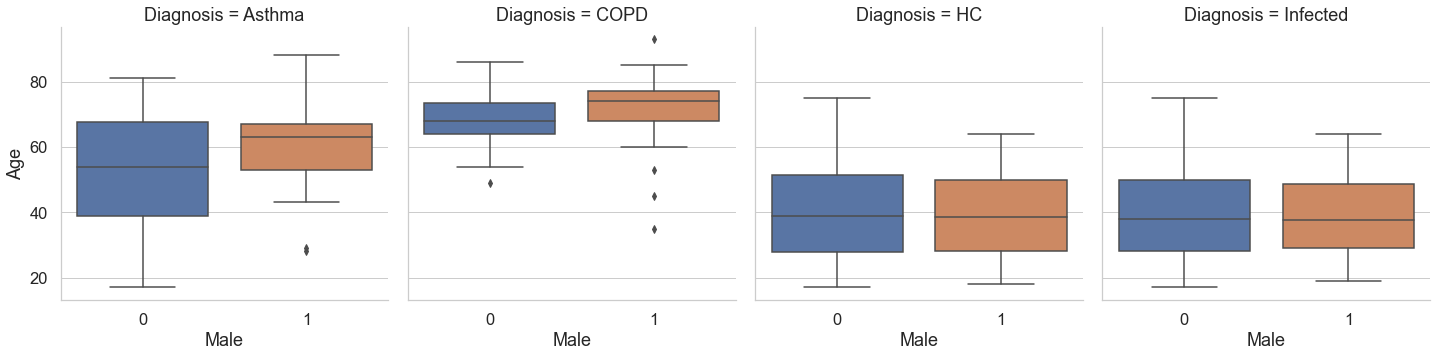

In [19]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.catplot(
    x='Male',
    y='Age',
    data=df2,
    kind='box',
    col='Diagnosis')

In [20]:
df1['Smoking'].replace({1: 'Never Smoked', 2: 'Ex-Smoker', 3: 'Current Smoker'}, inplace= True)

In [21]:
df1['Gender'].replace({0:'Female', 1:'Male'}, inplace=True)

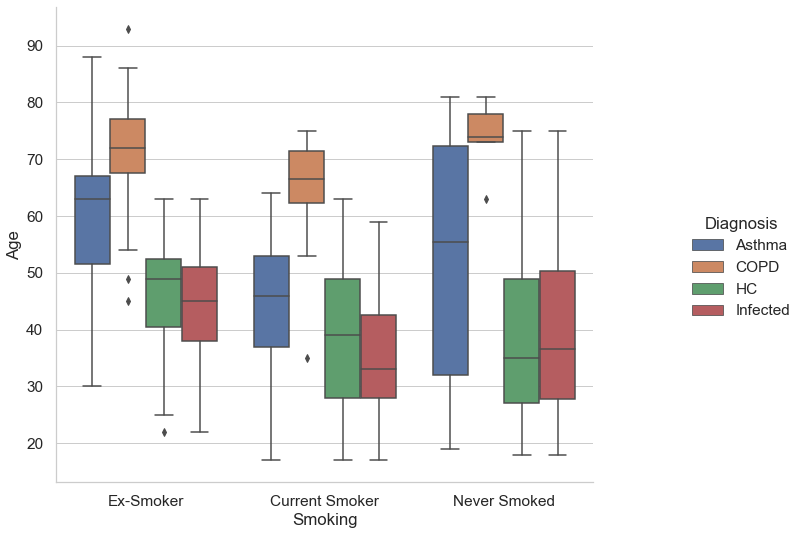

In [23]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(
    x='Smoking',
    y='Age',
    data=df1,
    kind='box',
    hue='Diagnosis')
fig =plt.gcf()
fig.set_size_inches(12, 8)

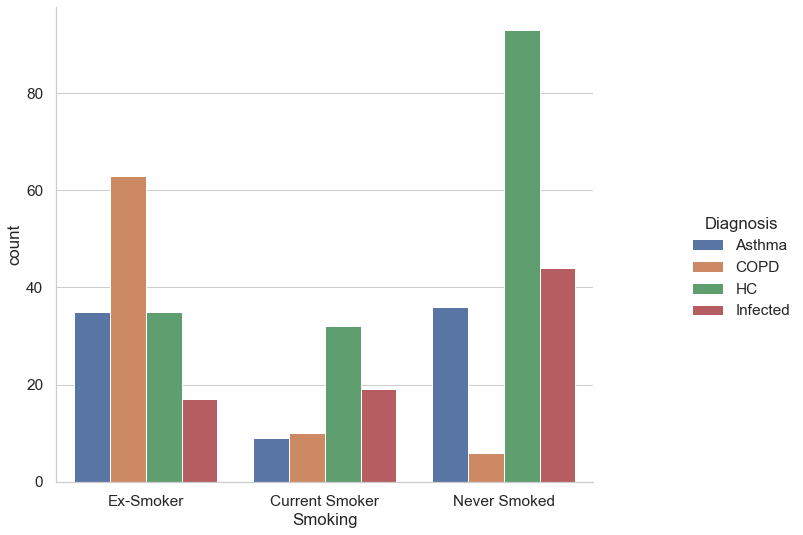

In [24]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(
    x='Smoking',
    data=df1,
    kind='count',
    hue='Diagnosis')
fig =plt.gcf()
fig.set_size_inches(12, 8)

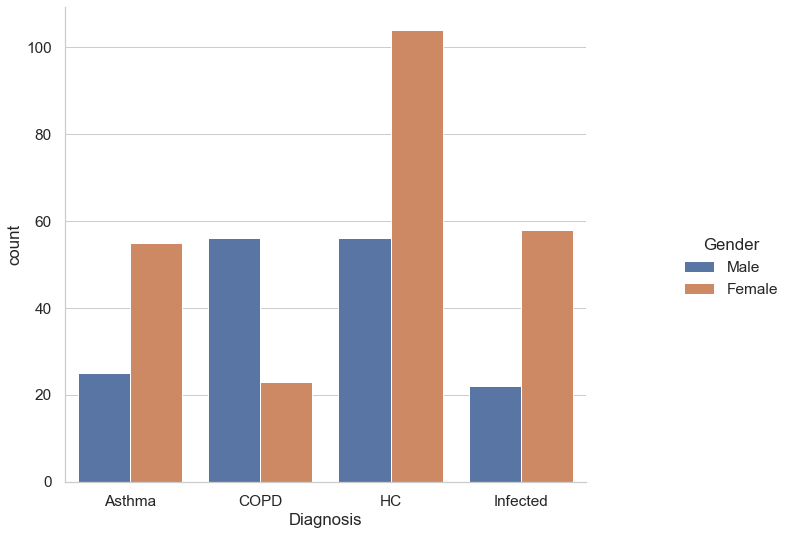

In [25]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(
    x='Diagnosis',
    data=df1,
    kind='count',
    hue='Gender')
fig =plt.gcf()
fig.set_size_inches(12, 8)

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Age ~ C(Diagnosis)', data=df1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

C:\Users\damps\Anaconda3\Anaconda3a\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(Diagnosis),63924.421744,3.0,114.858577,1.739059e-53
Residual,73278.946677,395.0,NaN,NaN


In [35]:
pair_t = model.t_test_pairwise('C(Diagnosis)', method='Bonferroni')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-Bonferroni,reject-Bonferroni
COPD-Asthma,15.498418,2.160385,7.173916,3.625566e-12,11.251128,19.745708,2.175339e-11,True
HC-Asthma,-15.887500,1.865055,-8.518514,3.437762e-16,-19.554176,-12.220824,2.062657e-15,True
Infected-Asthma,-16.637500,2.153580,-7.725507,9.283248e-14,-20.871413,-12.403587,5.569949e-13,True
HC-COPD,-31.385918,1.872908,-16.757852,5.347169e-48,-35.068032,-27.703803,3.208302e-47,True
Infected-COPD,-32.135918,2.160385,-14.875091,4.701564e-40,-36.383208,-27.888628,2.820939e-39,True
Infected-HC,-0.750000,1.865055,-0.402133,6.878038e-01,-4.416676,2.916676,1.000000e+00,False
